In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [21]:
img = cv2.imread('/content/download (4).jpg', cv2.IMREAD_GRAYSCALE)

In [22]:
if img is None:
    raise FileNotFoundError("Image not found. Please check the file path.")


In [23]:
def add_gaussian_noise(image, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy = image.astype(np.float32) + gauss
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

In [24]:
# Salt & Pepper noise
def add_salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    noisy = np.copy(image)
    total_pixels = image.size

    # Salt noise (white pixels)
    num_salt = int(salt_prob * total_pixels)
    coords = [np.random.randint(0, i, num_salt) for i in image.shape]
    noisy[coords[0], coords[1]] = 255

    # Pepper noise (black pixels)
    num_pepper = int(pepper_prob * total_pixels)
    coords = [np.random.randint(0, i, num_pepper) for i in image.shape]
    noisy[coords[0], coords[1]] = 0

    return noisy


In [25]:
def add_impulse_noise(image, noise_prob=0.02):
    noisy = np.copy(image)
    total_pixels = image.size
    num_noisy = int(noise_prob * total_pixels)

    coords = [np.random.randint(0, i, num_noisy) for i in image.shape]
    random_vals = np.random.randint(0, 256, num_noisy)
    noisy[coords[0], coords[1]] = random_vals

    return noisy

In [26]:
gauss_img = add_gaussian_noise(img)
sp_img = add_salt_pepper_noise(img)
impulse_img = add_impulse_noise(img)

# List of noise models
noises = [('Gaussian Noise', gauss_img),
          ('Salt & Pepper Noise', sp_img),
          ('Impulse Noise', impulse_img)]

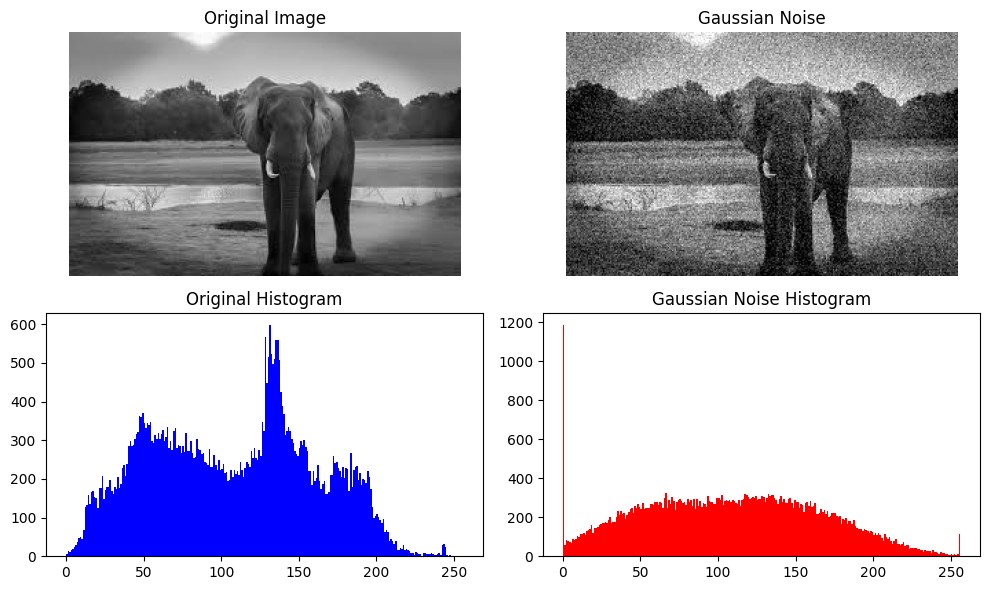

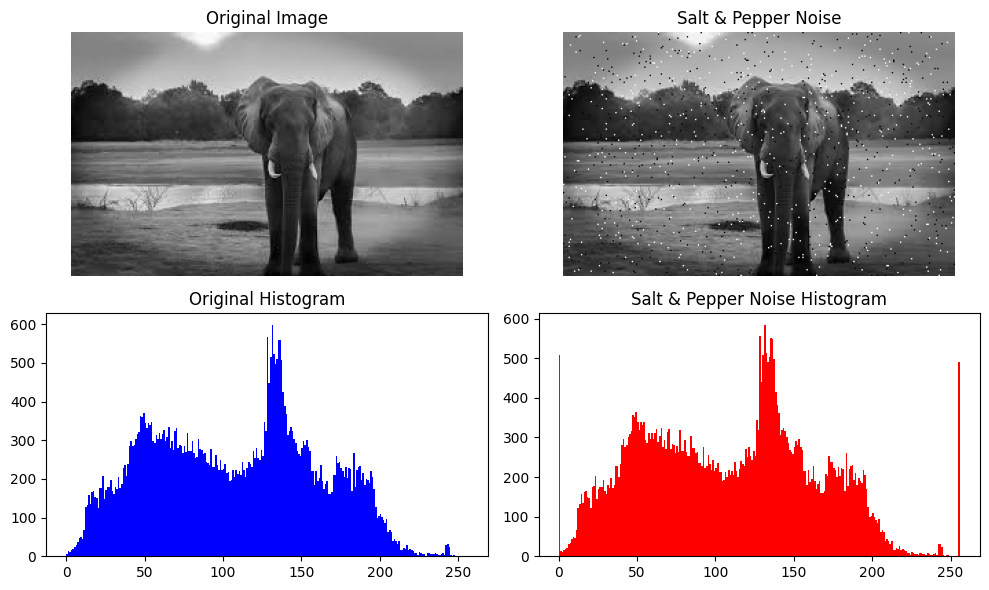

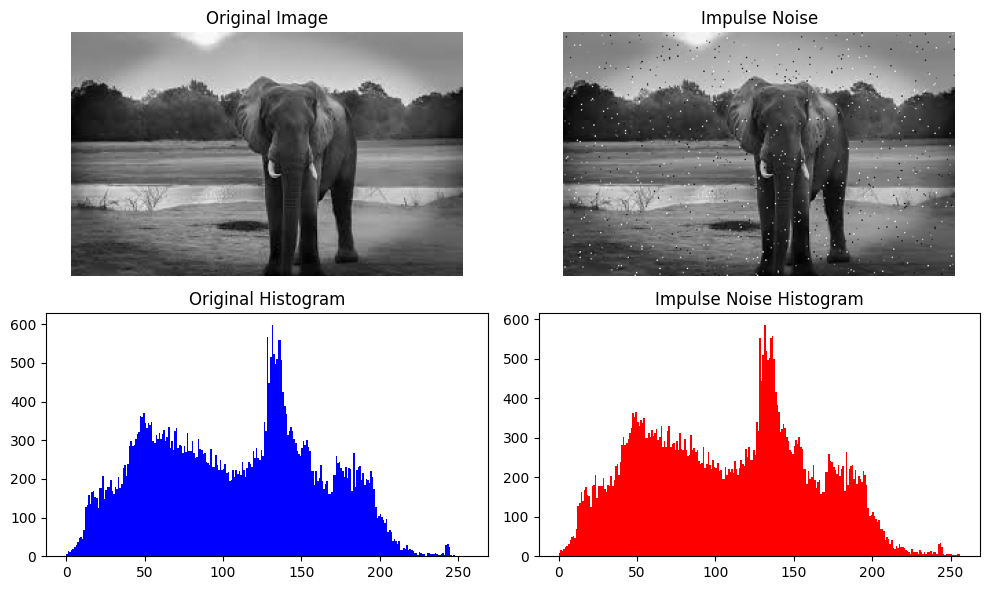

In [27]:
for title, noisy_img in noises:
    plt.figure(figsize=(10,6))

    # Images
    plt.subplot(2,2,1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(2,2,2)
    plt.imshow(noisy_img, cmap='gray')
    plt.title(title)
    plt.axis('off')

    # Histograms
    plt.subplot(2,2,3)
    plt.hist(img.ravel(), bins=256, range=[0,256], color='blue')
    plt.title("Original Histogram")

    plt.subplot(2,2,4)
    plt.hist(noisy_img.ravel(), bins=256, range=[0,256], color='red')
    plt.title(f"{title} Histogram")

    plt.tight_layout()
    plt.show()
